In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
from datetime import date, timedelta
import calendar

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from itables import show
pd.options.display.max_rows = 31

engine = create_engine("sqlite:///c:\\ruby\\expense\\db\\development.sqlite3")
conn = engine.connect()

In [2]:
sql = "SELECT C.name AS item, G.name AS kind FROM categories C \
       JOIN groups G ON group_id = G.id"
df_c = pd.read_sql(sql, conn)
df_c.head()

,item,kind
0,Books & Software,Edutainment
1,CCF,Luxury
2,Cigarette,Luxury
3,Food,Food
4,Fuel,Transportation


In [4]:
month = date(2022, 3, 1)
bom = month
eom = month.replace(day=calendar.monthrange(month.year, month.month)[1])
bom, eom

(datetime.date(2022, 3, 1), datetime.date(2022, 3, 31))

In [5]:
bom
eom

datetime.date(2022, 3, 1)

datetime.date(2022, 3, 31)

In [6]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % eom
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-03-31" 
ORDER BY amount DESC



In [7]:
df = pd.read_sql(sql, conn)
df

,date,amount,item,kind
0,2022-03-31,10000,Parent,Parent
1,2022-03-31,1650,Pets,Pets
2,2022-03-31,640,Internet Home,Communication
3,2022-03-31,600,CCF,Luxury
4,2022-03-31,400,Miscellaneous,Others
5,2022-03-31,340,Packt,Edutainment
6,2022-03-31,320,Telephone Dtac,Communication
7,2022-03-31,190,Monthly Prime,Movies
8,2022-03-31,170,Google,Edutainment
9,2022-03-31,100,Apple,Edutainment


In [8]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY amount DESC
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-03-31" 
ORDER BY amount DESC



In [9]:
df_eom = pd.read_sql(sql, conn)
df_eom

,date,amount,item,kind
0,2022-03-31,10000,Parent,Parent
1,2022-03-31,1650,Pets,Pets
2,2022-03-31,640,Internet Home,Communication
3,2022-03-31,600,CCF,Luxury
4,2022-03-31,400,Miscellaneous,Others
5,2022-03-31,340,Packt,Edutainment
6,2022-03-31,320,Telephone Dtac,Communication
7,2022-03-31,190,Monthly Prime,Movies
8,2022-03-31,170,Google,Edutainment
9,2022-03-31,100,Apple,Edutainment


In [10]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "%s" AND "%s" 
ORDER BY date
"""
sql = sql % (bom, eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date BETWEEN "2022-03-01" AND "2022-03-31" 
ORDER BY date



In [11]:
df_t = pd.read_sql(sql, conn)
df_t.head()

,date,amount,item,kind
0,2022-03-01,16800,Shelter,Shelter
1,2022-03-03,380,Food,Food
2,2022-03-07,230,Food,Food
3,2022-03-07,940,Books & Software,Edutainment
4,2022-03-09,90,Transportation,Transportation


In [12]:
grouped = df_t.groupby("item")
grouped['amount'].sum()

item
Apple                 140
Books & Software      940
CCF                   600
Food                 2960
Funeral             34000
Google                170
Internet Home         640
Miscellaneous         400
Monthly Prime         190
Packt                 340
Parent              15000
Patreon                70
Personal Care         990
Pets                23570
Shelter             16800
Telephone Dtac        320
Transportation         90
Name: amount, dtype: int64

In [13]:
grouped = df_t.groupby("kind")
grouped['amount'].sum()

kind
Apparel             990
Communication       960
Edutainment        1660
Food               2960
Luxury              600
Movies              190
Others            34400
Parent            15000
Pets              23570
Shelter           16800
Transportation       90
Name: amount, dtype: int64

In [14]:
expense = grouped.amount.sum()
sum(expense)

97220

<Figure size 864x864 with 0 Axes>

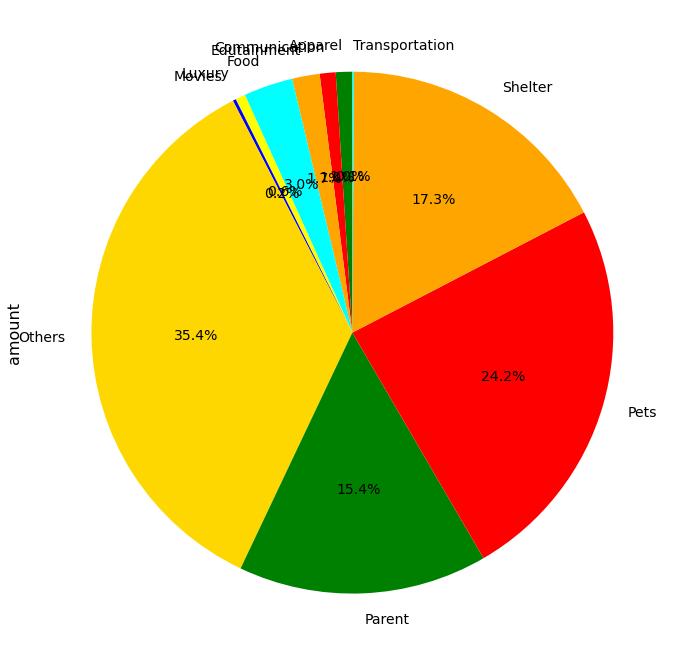

In [15]:
fig_path = "../fig/Expense-2203.png"
with plt.style.context("my_custom_style"):
    plt.figure(figsize=(12, 12))
    ax = expense.plot.pie(
        colors=["green", "red", "orange", "cyan", "yellow", "blue", "gold"],
        startangle=90,
        autopct="%1.1f%%",
    )
    plt.savefig(fig_path)

In [16]:
expense.to_csv("../data/expense-2203.csv")

In [17]:
sql = """
SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "%s" 
ORDER BY date
"""
sql = sql % (eom)
print(sql)


SELECT date,amount,C.name AS item, G.name AS kind FROM transactions T 
JOIN categories C ON category_id = C.id 
JOIN groups G ON group_id = G.id 
WHERE date = "2022-03-31" 
ORDER BY date



In [18]:
df_tmp = pd.read_sql(sql, conn)
show(df_tmp[['date','amount','item','kind']])

<IPython.core.display.Javascript object>

date,amount,item,kind


In [19]:
df_tmp.to_csv("../data/expense-eom.csv")